In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [129]:
credit_1 = pd.read_sas("/Users/xudawei/Desktop/Dash/Credit的副本/data/CREDIT.sas7bdat", 
                       format = 'sas7bdat', encoding = "ISO-8859-1")
data_1 = pd.DataFrame(credit_1)

data_1.head(n=2)

,Id,LIB_PTR_NIV_1,COD_ROL_TIE_1,COD_ROL_TIE_2,NBR_ECH_TOT,TYP_CDT,DAT_CRE_DMD,MNT_ACH,MNT_OCT,COD_SIT_FAM,cod_sit_fam2,NBR_EFT_CHG,TYP_CTR_TRV,COD_PCS,cod_pcs2,profmax,profmax2,COD_SIT_LOG,cod_sit_log2,DAT_OUV_CPT_PLECLI,COD_BQE,COD_SEX,DAT_NAI,age,agemax,DAT_EMB,MNT_SAL,MNT_RTI,MNT_PSN_IVD,DAT_ENT_LOG,TYP_CPT_COU,typ_cpt_cou2,COD_NTE_1_422,COD_NTE_1_423,COD_NTE_1_424,COD_NTE_1_425,COD_NTE_1_426,COD_NTE_1_427,COD_NTE_1_428,COD_NTE_1_429,COD_NTE_1_430,COD_NTE_1_431,COD_NTE_1_432,COD_NTE_1_433,COD_NTE_1_434,COD_NTE_1_435,sit6m_4,age_r,MNT_OCT_r,NBR_ECH_TOT_r,MNT_ACH_r
0,I1,"Enseigne mode, beauté, maison",E,A,30.0,REN,2015-02-23,0.0,1000.0,M,Marié,1.0,CDI,5400.0,Employés,5.0,Employés,A,Accession à la propriété,2014-01-01,8000.0,F,1975-06-27,39.0,45.0,2006-01-01,1400.0,0.0,0.0,2008-01-01,3.0,Compte joint,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,B,2.0,1.0,2.0,1.0
1,I10,"Enseigne mode, beauté, maison",E,NaN,33.0,REN,2015-07-28,0.0,1000.0,C,Célibataire,2.0,AUT,2100.0,"Artisans, commerçants et chefs d'entreprise",2.0,"Artisans, commerçants et chefs d'entreprise",A,Accession à la propriété,2000-01-01,30006.0,F,1963-03-29,52.0,52.0,2007-09-01,2000.0,0.0,0.0,1991-01-01,1.0,Compte de l'emprunteur,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I,3.0,1.0,2.0,1.0


In [130]:
# supprimer des varaibles répétées
data=data_1[['sit6m_4','LIB_PTR_NIV_1','NBR_ECH_TOT','TYP_CDT','MNT_ACH','MNT_OCT','COD_SIT_FAM',
    'NBR_EFT_CHG','TYP_CTR_TRV','cod_pcs2','cod_sit_log2','COD_SEX','age',
   'MNT_SAL','MNT_RTI','MNT_PSN_IVD']]
data.head(n=2)

,sit6m_4,LIB_PTR_NIV_1,NBR_ECH_TOT,TYP_CDT,MNT_ACH,MNT_OCT,COD_SIT_FAM,NBR_EFT_CHG,TYP_CTR_TRV,cod_pcs2,cod_sit_log2,COD_SEX,age,MNT_SAL,MNT_RTI,MNT_PSN_IVD
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0,0.0,0.0
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0,0.0,0.0


In [131]:
data['revenu'] = (data['MNT_SAL'] + data['MNT_RTI'] + data['MNT_PSN_IVD'])

/Users/xudawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
df = data.drop(columns= ['MNT_SAL','MNT_RTI','MNT_PSN_IVD'])

In [133]:
df.head(n=2)

,sit6m_4,LIB_PTR_NIV_1,NBR_ECH_TOT,TYP_CDT,MNT_ACH,MNT_OCT,COD_SIT_FAM,NBR_EFT_CHG,TYP_CTR_TRV,cod_pcs2,cod_sit_log2,COD_SEX,age,revenu
0,B,"Enseigne mode, beauté, maison",30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,I,"Enseigne mode, beauté, maison",33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [134]:
# changer le nom des columns
columns = ['Credit','Partenaire','Durée_du_crédit',
           'Type_de_produit','Montant_du_crédit','Montant_du_renouvelable',
          'Situation_familliale','Nombre_enfant','Contrat_de_travail',
           'Profession','Situation_logement','Sex','Age','Revenu']
df.columns = columns
df.head()
df.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/Kmeans')

In [135]:
df.shape

(64790, 14)

In [136]:
df.isnull().sum()

Credit                         0
Partenaire                     0
Durée_du_crédit                0
Type_de_produit                0
Montant_du_crédit              0
Montant_du_renouvelable        0
Situation_familliale           0
Nombre_enfant                  0
Contrat_de_travail         16483
Profession                     0
Situation_logement             0
Sex                            0
Age                            0
Revenu                         0
dtype: int64

In [137]:
# age, revenu, durée du credit : variables continues
credit_dict = {"B": 1, "I":1,"M":0}
def obj_credit(credit):
    changer = credit_dict
    return changer[credit]
df['Credit']=df['Credit'].apply(obj_credit)


In [138]:
df['Credit'].unique()

array([1, 0])

In [139]:
Partenaire_list = np.unique(df['Partenaire'].values).tolist()
Partenaire_dict, anti_Partenaire_dict = {},{}
for (item, index) in enumerate(Partenaire_list):
    Partenaire_dict[index] = item
    anti_Partenaire_dict[item] = index

anti_Partenaire_dict


{0: 'Enseigne AUTRES',
 1: 'Enseigne Bijouterie',
 2: 'Enseigne Electroménager',
 3: 'Enseigne Optique 1',
 4: 'Enseigne Optique 2',
 5: 'Enseigne Optique 3',
 6: 'Enseigne audition',
 7: 'Enseigne mode, beauté, maison',
 8: 'Enseigne réparation auto'}

In [140]:
#changer le tyep de 'Partenaire'
def obj2num_Partenaire(Partenaire):
    changer = Partenaire_dict
    return changer[Partenaire]
df['Partenaire']=df['Partenaire'].apply(obj2num_Partenaire)

In [141]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,REN,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,REN,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [142]:
Type_de_produit_list = np.unique(df['Type_de_produit'].values).tolist()
Type_de_produit_dict, anti_Type_de_produit_dict = {},{}
for (item, index) in enumerate(Type_de_produit_list):
    Type_de_produit_dict[index] = item
    anti_Type_de_produit_dict[item] = index

anti_Type_de_produit_dict


{0: 'AMO', 1: 'REN'}

In [143]:
#changer le tyep de 'Type_de_produit'
def obj2num_Type_de_produit(Type_de_produit):
    changer = Type_de_produit_dict
    return changer[Type_de_produit]
df['Type_de_produit']=df['Type_de_produit'].apply(obj2num_Type_de_produit)

In [144]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,M,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,C,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [145]:
Situation_familliale_list = np.unique(df['Situation_familliale'].values).tolist()
Situation_familliale_dict, anti_Situation_familliale_dict = {},{}
for (item, index) in enumerate(Situation_familliale_list):
    Situation_familliale_dict[index] = item
    anti_Situation_familliale_dict[item] = index

anti_Situation_familliale_dict

{0: 'C', 1: 'D', 2: 'K', 3: 'M', 4: 'P', 5: 'S', 6: 'V'}

In [146]:
#changer le tyep de 'Situation_familliale'
def obj2num_Situation_familliale(Situation_familliale):
    changer = Situation_familliale_dict
    return changer[Situation_familliale]
df['Situation_familliale']=df['Situation_familliale'].apply(obj2num_Situation_familliale)

In [147]:
df['Contrat_de_travail']=df['Contrat_de_travail'].fillna('NON')
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,CDI,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,AUT,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [148]:
Contrat_de_travail_list = np.unique(df['Contrat_de_travail'].values).tolist()
Contrat_de_travail_dict, anti_Contrat_de_travail_dict = {},{}
for (item, index) in enumerate(Contrat_de_travail_list):
    Contrat_de_travail_dict[index] = item
    anti_Contrat_de_travail_dict[item] = index

anti_Contrat_de_travail_dict

{0: 'AUT', 1: 'CDD', 2: 'CDI', 3: 'INT', 4: 'NON'}

In [149]:
#changer le tyep de 'Contrat_de_travail'
def obj2num_Contrat_de_travail(Contrat_de_travail):
    changer = Contrat_de_travail_dict
    return changer[Contrat_de_travail]
df['Contrat_de_travail']=df['Contrat_de_travail'].apply(obj2num_Contrat_de_travail)

In [150]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,Employés,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,"Artisans, commerçants et chefs d'entreprise",Accession à la propriété,F,52.0,2000.0


In [151]:
Profession_list = np.unique(df['Profession'].values).tolist()
Profession_dict, anti_Profession_dict = {},{}
for (item, index) in enumerate(Profession_list):
    Profession_dict[index] = item
    anti_Profession_dict[item] = index

anti_Profession_dict

{0: 'Agriculteurs exploitants',
 1: "Artisans, commerçants et chefs d'entreprise",
 2: 'Cadres et professions intellectuelles supérieures',
 3: 'Employés',
 4: 'Invalidités',
 5: 'Ouvriers',
 6: 'Professions intermédiaires',
 7: 'Retraités',
 8: 'Sans activité professionnelle'}

In [152]:
#changer le tyep de 'Profession'
def obj2num_Profession(Profession):
    changer = Profession_dict
    return changer[Profession]
df['Profession']=df['Profession'].apply(obj2num_Profession)

In [153]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,3,Accession à la propriété,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,1,Accession à la propriété,F,52.0,2000.0


In [154]:
Situation_logement_list = np.unique(df['Situation_logement'].values).tolist()
Situation_logement_dict, anti_Situation_logement_dict = {},{}
for (item, index) in enumerate(Situation_logement_list):
    Situation_logement_dict[index] = item
    anti_Situation_logement_dict[item] = index

anti_Situation_logement_dict

{0: 'Accession à la propriété',
 1: 'Locataire',
 2: 'Logement de fonction',
 3: 'Logé par famille',
 4: 'Propriétaire'}

In [155]:
#changer le tyep de 'Situation_logement'
def obj2num_Situation_logement(Situation_logement):
    changer = Situation_logement_dict
    return changer[Situation_logement]
df['Situation_logement']=df['Situation_logement'].apply(obj2num_Situation_logement)

In [156]:
df.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.0,1000.0,3,1.0,2,3,0,F,39.0,1400.0
1,1,7,33.0,1,0.0,1000.0,0,2.0,0,1,0,F,52.0,2000.0


In [157]:
Sex_list = np.unique(df['Sex'].values).tolist()
Sex_dict, anti_Sex_dict = {},{}
for (item, index) in enumerate(Sex_list):
    Sex_dict[index] = item
    anti_Sex_dict[item] = index

anti_Sex_dict

{0: 'F', 1: 'M'}

In [158]:
#changer le tyep de 'Sex'
def obj2num_Sex(Sex):
    changer = Sex_dict
    return changer[Sex]
df['Sex']=df['Sex'].apply(obj2num_Sex)

In [159]:
df.head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,7,30.0,1,0.00,1000.00,3,1.0,2,3,0,0,39.0,1400.0
1,1,7,33.0,1,0.00,1000.00,0,2.0,0,1,0,0,52.0,2000.0
2,1,8,30.0,1,0.00,1000.00,0,0.0,2,3,3,1,21.0,750.0
3,1,8,4.0,1,122.58,3000.00,6,0.0,4,7,4,0,83.0,1600.0
4,1,2,15.0,0,499.99,499.99,0,0.0,2,5,1,1,41.0,1400.0


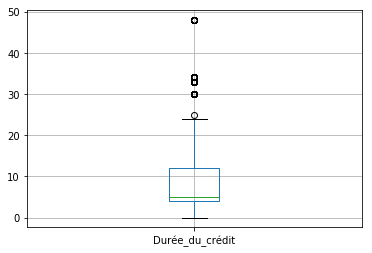

In [160]:
# traitement des valeurs aberrents des variables quantitatives
# 
df['Durée_du_crédit'].plot(kind ='box',grid = True)

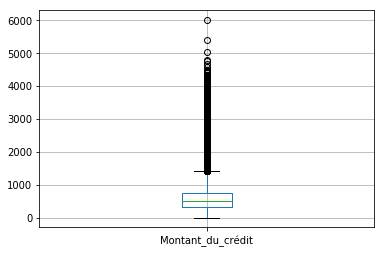

In [161]:
df['Montant_du_crédit'].plot.box(grid = True)

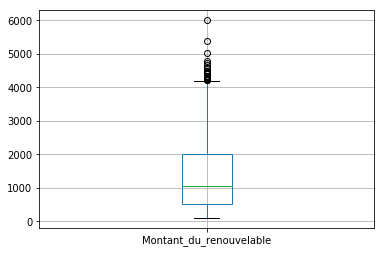

In [162]:
df['Montant_du_renouvelable'].plot.box(grid = True)

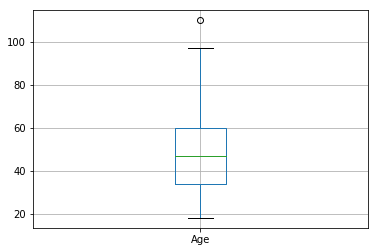

In [163]:
df['Age'].plot.box(grid = True)

In [164]:
df = df[df["Age"] < 100]
df['Age'].unique()

array([39., 52., 21., 83., 41., 33., 26., 55., 60., 51., 22., 50., 20.,
       53., 45., 67., 30., 59., 54., 48., 62., 29., 69., 58., 27., 70.,
       63., 71., 37., 23., 42., 44., 25., 68., 56., 19., 24., 61., 57.,
       32., 34., 49., 36., 43., 64., 46., 72., 65., 31., 28., 81., 47.,
       38., 35., 40., 75., 82., 79., 91., 78., 73., 66., 89., 77., 80.,
       18., 74., 76., 88., 84., 87., 86., 85., 90., 92., 94., 97., 95.,
       93., 96.])

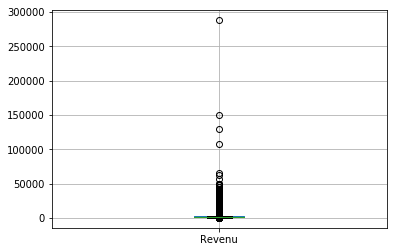

In [165]:
df['Revenu'].plot.box(grid = True)

In [166]:
df = df[df["Revenu"] < 100000]

df.shape
df.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/CleanData.csv', index=False)


In [167]:
# Au total, 5 valeurs aberrantes ont été supprimées

In [168]:
df.describe().T.assign(missing_rate = df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
Credit,64785.0,0.988686,0.105766,0.0,1.00,1.00,1.0,1.0,0.0
Partenaire,64785.0,5.069430,2.902858,0.0,2.00,6.00,8.0,8.0,0.0
Durée_du_crédit,64785.0,9.226827,7.624030,0.0,4.00,5.00,12.0,48.0,0.0
Type_de_produit,64785.0,0.405804,0.491051,0.0,0.00,0.00,1.0,1.0,0.0
Montant_du_crédit,64785.0,634.694273,551.400672,0.0,304.95,485.99,750.0,6000.0,0.0
Montant_du_renouvelable,64785.0,1401.249497,965.489389,100.0,532.99,1041.76,2000.0,6000.0,0.0
Situation_familliale,64785.0,2.124365,1.621913,0.0,0.00,3.00,3.0,6.0,0.0
Nombre_enfant,64785.0,0.751455,1.093408,0.0,0.00,0.00,1.0,10.0,0.0
Contrat_de_travail,64785.0,2.463410,0.935163,0.0,2.00,2.00,4.0,4.0,0.0
Profession,64785.0,4.696319,1.915322,0.0,3.00,5.00,6.0,8.0,0.0


In [169]:
from sklearn.model_selection import train_test_split



In [170]:
# l'échantillon d'apprentissage : l'échantillon test = 7:3
Y = df["Credit"]
X = df.iloc[:, 1:]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/TrainData.csv',index=False)
test.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/TestData.csv',index=False)

In [171]:
import scipy.stats.stats as stats

# 自定义自动分箱函数
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe



In [172]:
train.head()


,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
5512,1,8,4.0,1,422.16,2000.00,2,1.0,2,6,4,0,44.0,2000.0
6554,1,8,1.0,1,486.48,2000.00,3,0.0,4,7,4,1,68.0,1800.0
21337,1,8,4.0,1,284.76,3000.00,1,3.0,2,6,1,0,47.0,1600.0
19270,1,8,10.0,0,1009.89,1009.89,3,3.0,2,2,0,1,44.0,3200.0
9349,1,8,4.0,0,123.76,123.76,3,4.0,2,3,1,0,41.0,1200.0


In [173]:
dfx1, ivx1, cutx1, woex1 = mono_bin(train.Credit, train.Partenaire, n=13)



                    min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                          
(0.999, 15117.0]      0    2  14878  15117  0.984190 -0.371358       0.331713   
(15117.0, 30233.0]    2    8  14968  15116  0.990209  0.113924       0.333720   
(30233.0, 45349.0]    8    8  15006  15116  0.992723  0.413192       0.334567   

                    badattribute  
Bucket                            
(0.999, 15117.0]        0.480885  
(15117.0, 30233.0]      0.297787  
(30233.0, 45349.0]      0.221328  


In [174]:
dfx2, ivx2, cutx2, woex2 = mono_bin(train.Credit, train.Durée_du_crédit, n=13)

                     min   max    sum  total      rate       woe  \
Bucket                                                             
(0.999, 11338.0]     0.0   4.0  11284  11338  0.995237  0.839624   
(11338.0, 22675.0]   4.0   5.0  11267  11337  0.993826  0.578605   
(22675.0, 34012.0]   5.0  12.0  11185  11337  0.986593 -0.204085   
(34012.0, 45349.0]  12.0  48.0  11116  11337  0.980506 -0.584555   

                    goodattribute  badattribute  
Bucket                                           
(0.999, 11338.0]         0.251583      0.108652  
(11338.0, 22675.0]       0.251204      0.140845  
(22675.0, 34012.0]       0.249376      0.305835  
(34012.0, 45349.0]       0.247837      0.444668  


In [175]:
dfx3, ivx3, cutx3, woex3 = mono_bin(train.Credit, train.Type_de_produit, n=13)

                    min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                          
(0.999, 15117.0]      0    0  14906  15117  0.986042 -0.244872       0.332337   
(15117.0, 30233.0]    0    1  14948  15116  0.988886 -0.014165       0.333274   
(30233.0, 45349.0]    1    1  14998  15116  0.992194  0.342454       0.334389   

                    badattribute  
Bucket                            
(0.999, 15117.0]        0.424547  
(15117.0, 30233.0]      0.338028  
(30233.0, 45349.0]      0.237425  


In [176]:
dfx4, ivx4, cutx4, woex4 = mono_bin(train.Credit, train.Montant_du_crédit, n=13)

                       min      max    sum  total      rate       woe  \
Bucket                                                                  
(0.999, 11338.0]      0.00   305.70  11268  11338  0.993826  0.578693   
(11338.0, 22675.0]  305.71   487.56  11263  11337  0.993473  0.522680   
(22675.0, 34012.0]  487.60   752.02  11253  11337  0.992591  0.395040   
(34012.0, 45349.0]  752.16  5380.00  11068  11337  0.976272 -0.785431   

                    goodattribute  badattribute  
Bucket                                           
(0.999, 11338.0]         0.251226      0.140845  
(11338.0, 22675.0]       0.251115      0.148893  
(22675.0, 34012.0]       0.250892      0.169014  
(34012.0, 45349.0]       0.246767      0.541247  


In [177]:
dfx5, ivx5, cutx5, woex5 = mono_bin(train.Credit, train.Montant_du_renouvelable, n=13)

                    min     max    sum  total      rate           woe  \
Bucket                                                                  
(0.999, 45349.0]  100.0  5380.0  44852  45349  0.989041 -4.996004e-15   

                  goodattribute  badattribute  
Bucket                                         
(0.999, 45349.0]            1.0           1.0  


In [178]:
dfx6, ivx6, cutx6, woex6 = mono_bin(train.Credit, train.Situation_familliale, n=13)

                    min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                          
(0.999, 11338.0]      0    0  11033  11338  0.973099 -0.914199       0.245987   
(11338.0, 22675.0]    0    3  11212  11337  0.988974 -0.006107       0.249978   
(22675.0, 34012.0]    3    3  11303  11337  0.997001  1.303929       0.252007   
(34012.0, 45349.0]    3    6  11304  11337  0.997089  1.333871       0.252029   

                    badattribute  
Bucket                            
(0.999, 11338.0]        0.613682  
(11338.0, 22675.0]      0.251509  
(22675.0, 34012.0]      0.068410  
(34012.0, 45349.0]      0.066398  


In [179]:
dfx7, ivx7, cutx7, woex7 = mono_bin(train.Credit, train.Nombre_enfant, n=13)

                    min   max    sum  total      rate       woe  \
Bucket                                                            
(0.999, 15117.0]    0.0   0.0  14911  15117  0.986373 -0.220555   
(15117.0, 30233.0]  0.0   1.0  14943  15116  0.988555 -0.043827   
(30233.0, 45349.0]  1.0  10.0  14998  15116  0.992194  0.342454   

                    goodattribute  badattribute  
Bucket                                           
(0.999, 15117.0]         0.332449      0.414487  
(15117.0, 30233.0]       0.333162      0.348089  
(30233.0, 45349.0]       0.334389      0.237425  


In [180]:
dfx8, ivx8, cutx8, woex8 = mono_bin(train.Credit, train.Contrat_de_travail, n=13)

                    min  max    sum  total      rate       woe  goodattribute  \
Bucket                                                                          
(0.999, 15117.0]      0    2  14905  15117  0.985976 -0.249668       0.332315   
(15117.0, 30233.0]    2    2  14916  15116  0.986769 -0.190661       0.332560   
(30233.0, 45349.0]    2    4  15031  15116  0.994377  0.672685       0.335124   

                    badattribute  
Bucket                            
(0.999, 15117.0]        0.426559  
(15117.0, 30233.0]      0.402414  
(30233.0, 45349.0]      0.171026  


In [181]:
dfx9, ivx9, cutx9, woex9 = mono_bin(train.Credit, train.Profession, n=13)

                  min  max    sum  total      rate           woe  \
Bucket                                                             
(0.999, 45349.0]    0    8  44852  45349  0.989041 -4.996004e-15   

                  goodattribute  badattribute  
Bucket                                         
(0.999, 45349.0]            1.0           1.0  


In [182]:
dfx10, ivx10, cutx10, woex10 = mono_bin(train.Credit, train.Situation_logement, n=13)

                  min  max    sum  total      rate           woe  \
Bucket                                                             
(0.999, 45349.0]    0    4  44852  45349  0.989041 -4.996004e-15   

                  goodattribute  badattribute  
Bucket                                         
(0.999, 45349.0]            1.0           1.0  


In [183]:
dfx11, ivx11, cutx11, woex11 = mono_bin(train.Credit, train.Sex, n=13)

                  min  max    sum  total      rate           woe  \
Bucket                                                             
(0.999, 45349.0]    0    1  44852  45349  0.989041 -4.996004e-15   

                  goodattribute  badattribute  
Bucket                                         
(0.999, 45349.0]            1.0           1.0  


In [184]:
dfx12, ivx12, cutx12, woex12 = mono_bin(train.Credit, train.Age, n=13)

                         min   max   sum  total      rate       woe  \
Bucket                                                                
(0.999, 6479.286]       18.0  29.0  6256   6479  0.965581 -1.168409   
(6479.286, 12957.571]   29.0  36.0  6378   6478  0.984563 -0.347094   
(12957.571, 19435.857]  36.0  43.0  6426   6478  0.991973  0.314330   
(19435.857, 25914.143]  43.0  50.0  6427   6479  0.991974  0.314486   
(25914.143, 32392.429]  50.0  57.0  6442   6478  0.994443  0.684542   
(32392.429, 38870.714]  57.0  66.0  6454   6478  0.996295  1.091868   
(38870.714, 45349.0]    66.0  95.0  6469   6479  0.998457  1.969658   

                        goodattribute  badattribute  
Bucket                                               
(0.999, 6479.286]            0.139481      0.448692  
(6479.286, 12957.571]        0.142201      0.201207  
(12957.571, 19435.857]       0.143271      0.104628  
(19435.857, 25914.143]       0.143293      0.104628  
(25914.143, 32392.429]       0.14362

In [185]:
dfx13, ivx13, cutx13, woex13 = mono_bin(train.Credit, train.Revenu, n=13)

                  min      max    sum  total      rate           woe  \
Bucket                                                                 
(0.999, 45349.0]  0.0  62400.0  44852  45349  0.989041 -4.996004e-15   

                  goodattribute  badattribute  
Bucket                                         
(0.999, 45349.0]            1.0           1.0  


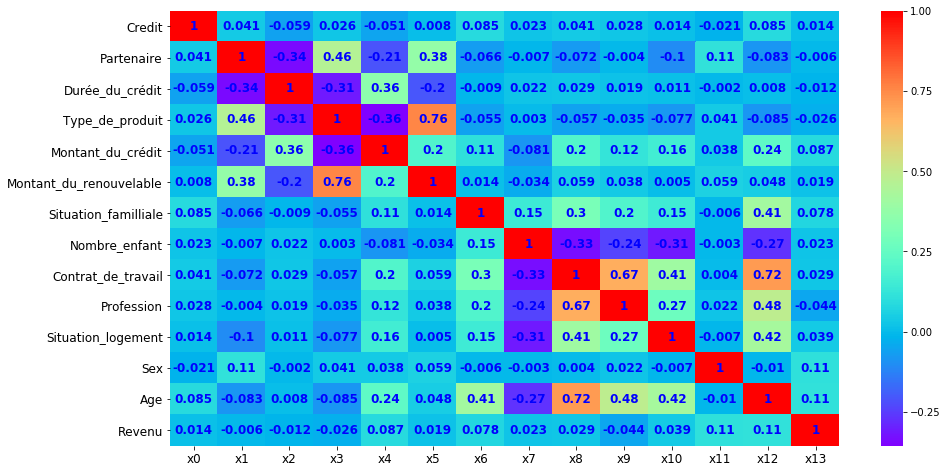

In [186]:
# corrélation entre les variables de l'échantillon d'apprentissage
corr = train.corr().round(3) 

xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13'] # labels of x axis 
yticks = list(corr.index) # label of y axis
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True,cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # Dessiner une carte thermique des coefficients de corrélation
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

In [187]:
# la corrélation entre les variables n'est pas très forte, sauf 
# Partenaire et Type_duproduit (0.46), Montant_du_renouvelable et Type_duproduit(0.76),
# Profession et Contra_de_travail(0.67), Age et Contra_de_travail(0.72) , 
# Age et profession(0.48), Age et Situation_logement(0.42)



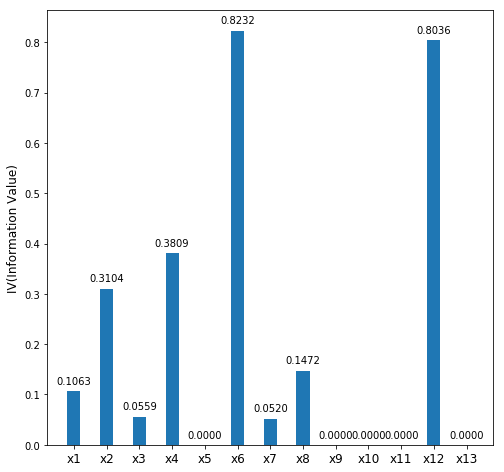

In [188]:
#  IV valeurs
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10,ivx11,ivx12,ivx13] 
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13'] 
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

In [189]:
# Le critère pour juger de la capacité prédictive d'une variable par la valeur IV est:


#         < 0.02: unpredictive

#           0.02 to 0.1: weak

#           0.1 to 0.3: medium

#           0.3 to 0.5: strong

#           > 0.5: suspicious

# par conséquent, 
# les variables Montant_du_renouvelable, Profession, Situation_logement, Sex et Revenu dont
# IV valeurs sont évidemment faible


In [190]:


# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [191]:
from pandas import Series
train = pd.read_csv("/Users/xudawei/Desktop/Dash/Credit的副本/data/TrainData.csv")
test = pd.read_csv("/Users/xudawei/Desktop/Dash/Credit的副本/data/TestData.csv")
train.head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,8,4.0,1,422.16,2000.00,2,1.0,2,6,4,0,44.0,2000.0
1,1,8,1.0,1,486.48,2000.00,3,0.0,4,7,4,1,68.0,1800.0
2,1,8,4.0,1,284.76,3000.00,1,3.0,2,6,1,0,47.0,1600.0
3,1,8,10.0,0,1009.89,1009.89,3,3.0,2,2,0,1,44.0,3200.0
4,1,8,4.0,0,123.76,123.76,3,4.0,2,3,1,0,41.0,1200.0


In [192]:
# changer a woe  sur l'échantillon d'apprentissage
train['Partenaire'] = Series(replace_woe(train['Partenaire'], cutx1, woex1))
train['Durée_du_crédit'] = Series(replace_woe(train['Durée_du_crédit'], cutx2, woex2))
train['Type_de_produit'] = Series(replace_woe(train['Type_de_produit'], cutx3, woex3))
train['Montant_du_crédit'] = Series(replace_woe(train['Montant_du_crédit'], cutx4, woex4))
train['Montant_du_renouvelable'] = Series(replace_woe(train['Montant_du_renouvelable'], cutx5, woex5))
train['Situation_familliale'] = Series(replace_woe(train['Situation_familliale'], cutx6, woex6))
train['Nombre_enfant'] = Series(replace_woe(train['Nombre_enfant'], cutx7, woex7))
train['Contrat_de_travail'] = Series(replace_woe(train['Contrat_de_travail'], cutx8, woex8))
train['Profession'] = Series(replace_woe(train['Profession'], cutx9, woex9))
train['Situation_logement'] = Series(replace_woe(train['Situation_logement'], cutx10, woex10))
train['Sex'] = Series(replace_woe(train['Sex'], cutx11, woex11))
train['Age'] = Series(replace_woe(train['Age'], cutx12, woex12))
train['Revenu'] = Series(replace_woe(train['Revenu'], cutx13, woex13))

train.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/Woetrain.csv', index=False)

In [193]:
# changer a woe  sur l'échantillon test
test['Partenaire'] = Series(replace_woe(test['Partenaire'], cutx1, woex1))
test['Durée_du_crédit'] = Series(replace_woe(test['Durée_du_crédit'], cutx2, woex2))
test['Type_de_produit'] = Series(replace_woe(test['Type_de_produit'], cutx3, woex3))
test['Montant_du_crédit'] = Series(replace_woe(test['Montant_du_crédit'], cutx4, woex4))
test['Montant_du_renouvelable'] = Series(replace_woe(test['Montant_du_renouvelable'], cutx5, woex5))
test['Situation_familliale'] = Series(replace_woe(test['Situation_familliale'], cutx6, woex6))
test['Nombre_enfant'] = Series(replace_woe(test['Nombre_enfant'], cutx7, woex7))
test['Contrat_de_travail'] = Series(replace_woe(test['Contrat_de_travail'], cutx8, woex8))
test['Profession'] = Series(replace_woe(test['Profession'], cutx9, woex9))
test['Situation_logement'] = Series(replace_woe(test['Situation_logement'], cutx10, woex10))
test['Sex'] = Series(replace_woe(test['Sex'], cutx11, woex11))
test['Age'] = Series(replace_woe(test['Age'], cutx12, woex12))
test['Revenu'] = Series(replace_woe(test['Revenu'], cutx13, woex13))

test.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/TestWoeData.csv', index=False)

In [194]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train=X_train, Y_train=Y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [196]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)


In [197]:
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [198]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [199]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)


In [200]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [201]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc')



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s finished


In [202]:
cvD



{'KNeighborsClassifier': [0.5562240823560781, 0.02326850833561105],
 'LogisticRegression': [0.81033542893095, 0.030146003717424923],
 'AdaBoostClassifier': [0.8299081684779832, 0.014024064383985143],
 'GradientBoostingClassifier': [0.8483982466081921, 0.023123118058154188],
 'RandomForestClassifier': [0.64607835263662, 0.03637594483015429]}

In [203]:
cvDictNormalize(cvD)



{'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.46', '1.30'],
 'AdaBoostClassifier': ['1.49', '0.60'],
 'GradientBoostingClassifier': ['1.53', '0.99'],
 'RandomForestClassifier': ['1.16', '1.56']}

In [204]:
# on peut savoir que LogisticRegression, AdaBoostClassifier et GradientBoostingClassifier
# dont out-of-the-bag sont les meilleurs



In [205]:
#AdaBoost modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [206]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}



In [207]:
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)



/Users/xudawei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   1.4s
[CV] n_estimators=50, learning_rate=0.05 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .............. n_estimators=50, learning_rate=0.05, total=   1.5s
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   1.4s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .............. n_estimators=100, learning_rate=0.1, total=   2.7s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .............. n_estimators=100, learning_rate=0.1, total=   2.9s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV] .............. n_estimators=100, learning_rate=0.1, total=   2.7s
[CV] n_estimators=400, learning_rate=0.1 .............................
[CV] .............. n_estimators=400, learning_rate=0.1, total=  10.8s
[CV] n_estimators=400, learning_rate=0.1 .............................
[CV] .............. n_estimators=400, learning_rate=0.1, total=  10.8s
[CV] n_estimators=400, learning_rate=0.1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.4min finished


In [208]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_



({'n_estimators': 200, 'learning_rate': 0.05}, 0.8433220082305132)

In [209]:
#GB-modèle
gbParams = {'loss' : ['deviance', 'exponential'],
            'n_estimators': [10,50,100,200,400],
            'max_depth': randint(1,5),
            'learning_rate':[0.1, 0.05]}


In [210]:
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, Y_train)



/Users/xudawei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50 .
[CV]  learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50, total=   0.6s
[CV] learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50 .
[CV]  learning_rate=0.05, loss=deviance, max_depth=1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100, total=   0.8s
[CV] learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100, total=   0.9s
[CV] learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100 
[CV]  learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100, total=   1.1s
[CV] learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=50 
[CV]  learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=50, total=   0.5s
[CV] learning_rate=0.05, loss=exponential, max_depth=1, n_estimators=50 
[CV]  learning_rate=0.05, loss=exponential

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


In [211]:
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_


({'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 3,
  'n_estimators': 200},
 0.8481081350866809)

In [112]:
bestGbModFitted = randomizedSearchGB.best_estimator_.fit(X_train, Y_train)


In [113]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)


In [114]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   53.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


In [115]:
cvDictNormalize(cvDictHPO)


{'GradientBoostingClassifier': ['1.00', '1.00'],
 'AdaBoostClassifier': ['0.99', '1.10']}

In [212]:
#   La matrice de confusion 

def rocZeroOne(y_true, y_predicted_porba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)])

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'Le meilleur point de la courbe ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + 'Meilleur point de coupure: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)

In [213]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    skf = StratifiedKFold(n_splits=nfolds)
    skf.get_n_splits(X, y)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    i = 0

    for train, test in skf.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        i = i +1

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= 5.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()




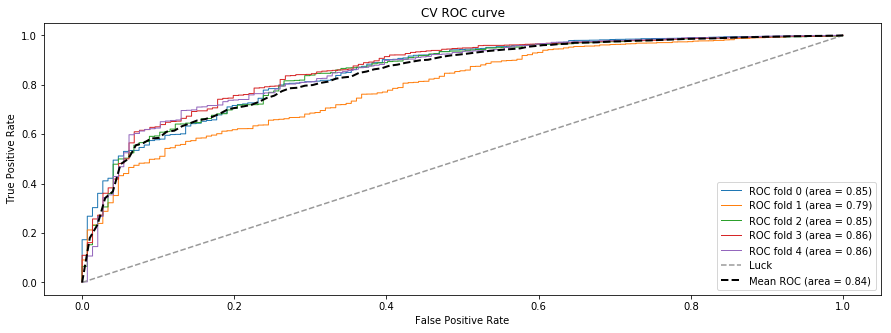

In [214]:
plotCvRocCurve(X, Y, randomizedSearchGB.best_estimator_)



Le meilleur point de la courbe ROC: TPR = 78.740%, FPR = 20.763%

Meilleur point de coupure: 0.9904


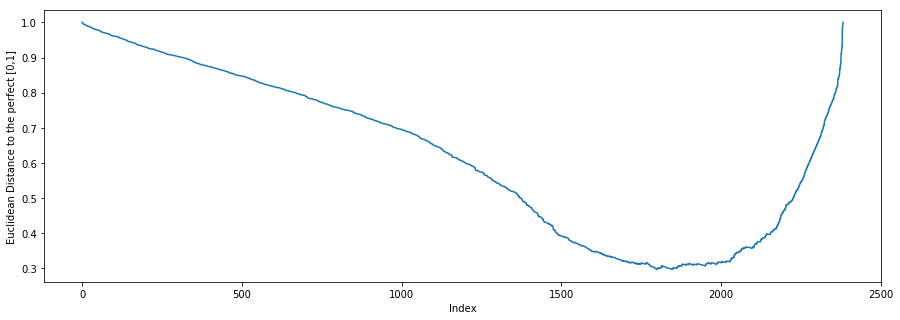

In [217]:
rocZeroOne(Y_test, randomizedSearchGB.predict_proba(X_test))



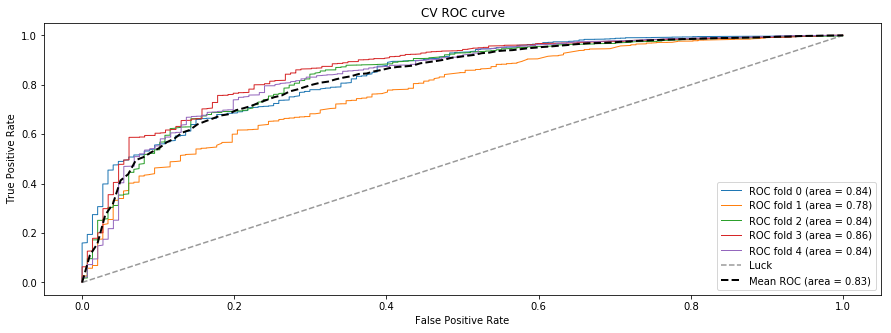

In [218]:
plotCvRocCurve(X, Y, randomizedSearchAda.best_estimator_)




Le meilleur point de la courbe ROC: TPR = 74.927%, FPR = 26.271%

Meilleur point de coupure: 0.6113


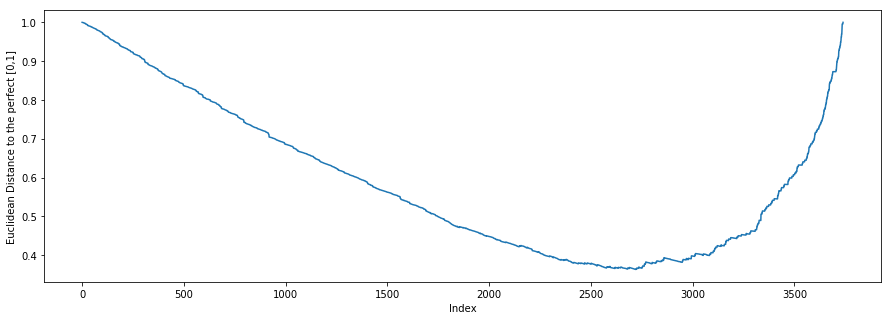

In [219]:
rocZeroOne(Y_test, randomizedSearchAda.predict_proba(X_test))



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

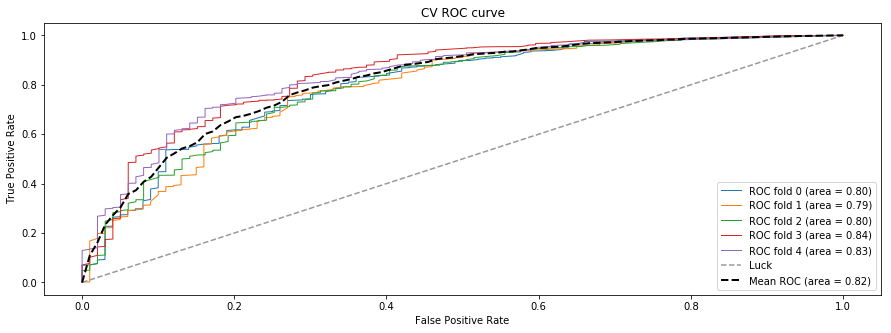

In [220]:
# LR-modèle
data = pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/Woetrain.csv')

data_Y = data['Credit']
# 1) Éliminer les variables qui n'affectent pas 
# de manière significative la variable dépendante: 
#                                                Credit','Montant_du_renouvelable','Revenu'
#                                               'Profession','Situation_logement','Sex',
#                   
# 2)  supprimer les variables corrélées： 

# Partenaire et Type_duproduit(0.46), Montant_du_renouvelable et Type_duproduit(0.76),
# Profession et Contra_de_travail(0.67), Age et Contra_de_travail(0.72) , 
# Age et profession(0.48), Age et Situation_logement(0.42)


data_X = data.drop(['Credit','Montant_du_renouvelable',
                    'Profession','Situation_logement','Sex',
                    'Revenu','Contrat_de_travail'],axis=1)
plotCvRocCurve(data_X, data_Y, lrMod.fit(data_X, data_Y))





Le meilleur point de la courbe ROC: TPR = 73.557%, FPR = 28.390%

Meilleur point de coupure: 0.9902


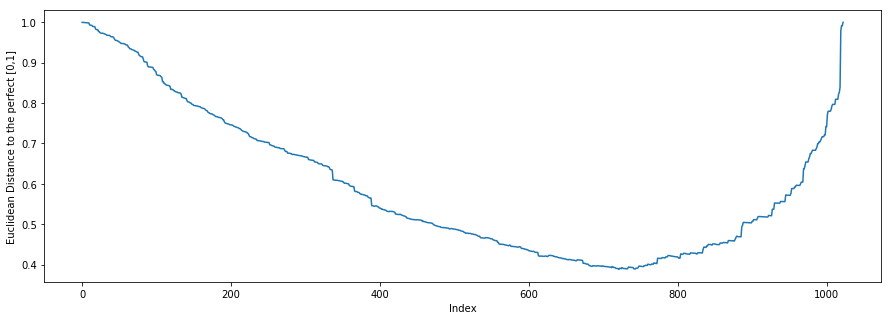

In [221]:
Y_test = test['Credit']
X_test = test.drop(['Credit','Montant_du_renouvelable',
                    'Profession','Situation_logement','Sex',
                    'Revenu','Contrat_de_travail'],axis=1)
rocZeroOne(Y_test, lrMod.predict_proba(X_test))


# 
1. AdaBoostClassifier:

({'n_estimators': 200, 'learning_rate': 0.05}, Scoring-ROC_AUC: 0.8433220082305132)

Le meilleur point de la courbe ROC: TPR = 74.927%, FPR = 26.271%

Meilleur point de coupure: 0.6113

F1 score: 0.389020

2. GradientBoostingClassifier:

({'learning_rate': 0.1,
  'loss': 'exponential',
  'max_depth': 3,
  'n_estimators': 200},
 Scoring-ROC_AUC:0.8481081350866809
)
Le meilleur point de la courbe ROC: TPR = 78.740%, FPR = 20.763%
Meilleur point de coupure: 0.9904

F1 score :  0.3286089

3. LogisticRegression:

Scoring-ROC_AUC: 0.8423220082305132

Le meilleur point de la courbe ROC: TPR = 73.557%, FPR = 28.390%

Meilleur point de coupure: 0.9902

F1 score : 0.4096801279 


Par conséquent, on choisit le modèle logistique pour la prévision (F 1 score est le plus fort 0.4097) 

In [223]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

data = pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/Woetrain.csv')

Y = data['Credit']

X = data.drop(['Credit','Montant_du_renouvelable',
                    'Profession','Situation_logement','Sex',
                    'Revenu','Contrat_de_travail'],axis=1)

X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.051361
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Credit   No. Observations:                45349
Model:                          Logit   Df Residuals:                    45341
Method:                           MLE   Df Model:                            7
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:                  0.1492
Time:                        09:21:57   Log-Likelihood:                -2329.2
converged:                       True   LL-Null:                       -2737.5
                                        LLR p-value:                4.791e-172
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7545      0.095     39.509      0.000       3.568       3.94

/Users/xudawei/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


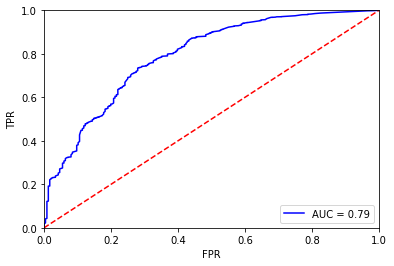

In [224]:
test = pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/TestWoeData.csv')
Y_test = test['Credit']

X_test = test.drop(['Credit','Montant_du_renouvelable',
                    'Profession','Situation_logement','Sex',
                    'Revenu','Contrat_de_travail'],axis=1)


X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [225]:
import math
#coe est les paramètres du modèle logistique

coe = [3.7545, 1.4733, 0.5476, -0.7092, 0.7990, 0.9564, 0.8400, 0.7487 ]

p = 20 / math.log(2)
q = 500 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [226]:
baseScore

522.0

In [227]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [228]:
# x5,x9,x10,x11 dont IV valeurs sont 0, du coup, on les suprimer 

# la corréspondance entre x8 et les autres sont très fortes,
# par conséquent, on la supprimer pour éviter multricolinéarité


x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x4 = get_score(coe[4], woex4, p)
x6 = get_score(coe[5], woex6, p)
x7 = get_score(coe[6], woex7, p)
x12 = get_score(coe[7], woex12, p)


In [229]:
print(x1,x2,x3,x4,x6,x7,x12)

[-16.0, 5.0, 18.0] [13.0, 9.0, -3.0, -9.0] [5.0, 0.0, -7.0] [13.0, 12.0, 9.0, -18.0] [-25.0, -0.0, 36.0, 37.0] [-5.0, -1.0, 8.0] [-25.0, -7.0, 7.0, 7.0, 15.0, 24.0, 43.0]


In [233]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [234]:
test1 = pd.read_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/TestData.csv')
test1.head(n=2)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu
0,1,8,4.0,1,526.58,2000.0,6,0.0,4,7,4,0,66.0,1700.0
1,1,2,3.0,1,549.99,3000.0,1,0.0,2,6,2,1,54.0,1500.0


In [235]:
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['Partenaire'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['Durée_du_crédit'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['Type_de_produit'], cutx3, x3))
test1['x4'] = Series(compute_score(test1['Montant_du_crédit'], cutx4, x4))

test1['x6'] = Series(compute_score(test1['Situation_familliale'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['Nombre_enfant'], cutx7, x7))
test1['x12'] = Series(compute_score(test1['Age'], cutx12, x12))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3']+ test1['x4'] +test1['x6'] + test1['x7'] +test1['x12']  + baseScore
test1.to_csv('/Users/xudawei/Desktop/Dash/Credit的副本/data/ScoreData.csv', index=False)


In [237]:
ScoreData = pd.read_csv("/Users/xudawei/Desktop/Dash/Credit的副本/data/ScoreData.csv")
ScoreData.head(n=5)

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu,BaseScore,x1,x2,x3,x4,x6,x7,x12,Score
0,1,8,4.0,1,526.58,2000.00,6,0.0,4,7,4,0,66.0,1700.0,522.0,18.0,9.0,-7.0,9.0,37.0,-1.0,43.0,630.0
1,1,2,3.0,1,549.99,3000.00,1,0.0,2,6,2,1,54.0,1500.0,522.0,5.0,13.0,-7.0,9.0,-0.0,-1.0,15.0,556.0
2,1,8,10.0,0,576.39,576.39,2,0.0,2,6,1,1,46.0,1600.0,522.0,18.0,-3.0,0.0,9.0,-0.0,-1.0,7.0,552.0
3,1,8,10.0,0,1588.12,1588.12,3,1.0,2,3,0,0,32.0,2045.0,522.0,18.0,-3.0,0.0,-18.0,37.0,8.0,-7.0,557.0
4,1,2,12.0,0,428.99,428.99,0,0.0,4,4,1,0,47.0,1095.0,522.0,5.0,-9.0,0.0,12.0,-0.0,-1.0,7.0,536.0


In [238]:
ScoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19436 entries, 0 to 19435
Data columns (total 23 columns):
Credit                     19436 non-null int64
Partenaire                 19436 non-null int64
Durée_du_crédit            19436 non-null float64
Type_de_produit            19436 non-null int64
Montant_du_crédit          19436 non-null float64
Montant_du_renouvelable    19436 non-null float64
Situation_familliale       19436 non-null int64
Nombre_enfant              19436 non-null float64
Contrat_de_travail         19436 non-null int64
Profession                 19436 non-null int64
Situation_logement         19436 non-null int64
Sex                        19436 non-null int64
Age                        19436 non-null float64
Revenu                     19436 non-null float64
BaseScore                  19436 non-null float64
x1                         19436 non-null float64
x2                         19436 non-null float64
x3                         19436 non-null float64
x4     

In [239]:
# de trouver des clients qui ont les bons credits
ScoreData[ScoreData.Credit == 1].head()

,Credit,Partenaire,Durée_du_crédit,Type_de_produit,Montant_du_crédit,Montant_du_renouvelable,Situation_familliale,Nombre_enfant,Contrat_de_travail,Profession,Situation_logement,Sex,Age,Revenu,BaseScore,x1,x2,x3,x4,x6,x7,x12,Score
0,1,8,4.0,1,526.58,2000.00,6,0.0,4,7,4,0,66.0,1700.0,522.0,18.0,9.0,-7.0,9.0,37.0,-1.0,43.0,630.0
1,1,2,3.0,1,549.99,3000.00,1,0.0,2,6,2,1,54.0,1500.0,522.0,5.0,13.0,-7.0,9.0,-0.0,-1.0,15.0,556.0
2,1,8,10.0,0,576.39,576.39,2,0.0,2,6,1,1,46.0,1600.0,522.0,18.0,-3.0,0.0,9.0,-0.0,-1.0,7.0,552.0
3,1,8,10.0,0,1588.12,1588.12,3,1.0,2,3,0,0,32.0,2045.0,522.0,18.0,-3.0,0.0,-18.0,37.0,8.0,-7.0,557.0
4,1,2,12.0,0,428.99,428.99,0,0.0,4,4,1,0,47.0,1095.0,522.0,5.0,-9.0,0.0,12.0,-0.0,-1.0,7.0,536.0
